# Task 1: Machine Learning Pipeline F136413

# Data and preminary analysis 

initially, we load the dataset from the depository and save it as a dataframe.

- after loading, we use methods to gain a greater understanding of the dataset

In [1]:
#importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

#naming the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv')


data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [2]:
data.head(10)
#first 10 entries to the dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [3]:
data.tail(10)
#last 10 entries to the dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1004,13,90,65,9.0,101.0,80,high risk
1005,17,90,65,7.7,103.0,67,high risk
1006,17,85,60,6.3,102.0,86,high risk
1007,40,120,75,7.7,98.0,70,high risk
1008,48,120,80,11.0,98.0,88,high risk
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [4]:
data.describe(include = "all")
#displaying main summarises about the data 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN


In [5]:
data.dtypes
#displaying the data types of our dataset

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

## Visualising the dataset 

I use the seaborn library to visualise the correlations between the attributes within the dataset

## Correlation matrix

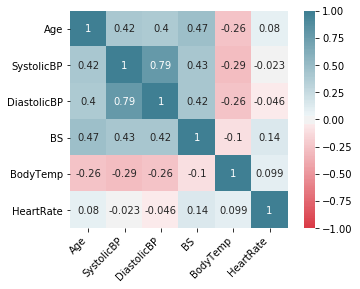

In [6]:
#importing the libraries
import seaborn as sns

#creating a variable 'corr'
# - creating a correlation matrix of all our variables

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(10, 220, n = 200),
    square = True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment ='right'
);


## Plotting means and & standard deviation

In [7]:
means = data.iloc[:,0:6].std() #finding the means for our dataset
standarddev = data.iloc[:,0:6].std()#finding the standard deviation from our dataset

print(means)

print(standarddev)

Age            13.474386
SystolicBP     18.403913
DiastolicBP    13.885796
BS              3.293532
BodyTemp        1.371384
HeartRate       8.088702
dtype: float64
Age            13.474386
SystolicBP     18.403913
DiastolicBP    13.885796
BS              3.293532
BodyTemp        1.371384
HeartRate       8.088702
dtype: float64


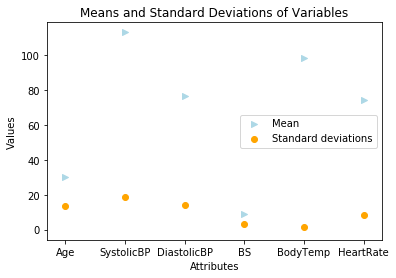

In [8]:
#creating a dataframe including all the means and standard deviations
df = pd.DataFrame({
    'variable': ['Age', 'SystolicBP','DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
    'mean': [29.871795, 113.198225, 76.460552, 8.725986, 98.665089, 74.301775],
    'std': [13.474386, 18.403913, 13.885796, 3.293532, 1.371384, 8.088702]})

#setting the x and y variables for plotting 
x = df.loc[:,"variable"]
y0 = df.loc[:, 'mean']
y1 = df.loc[:, 'std']

#plotting a scatter plot for both mean and standard deviation 
plt.scatter(x,y0, c = 'lightblue', marker = '>')
plt.scatter(x,y1, c = 'orange')
plt.gca().legend(('Mean','Standard deviations'))

#adding headings and columns 
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.title("Means and Standard Deviations of Variables")

#setting the style 
sns.set_style()

In [9]:
#checking the dataset for duplicate entires and any null variables 

print(data.duplicated().sum())
print(data.isnull().sum())

562
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


## Data pre-processing

- This involves altering the dataset in order for the data to be applicable to our machine learning models. it follows this order. 

1. encoding
2. feature scaling 
3. removing duplicates
4. splitting data 
5. feature selection

## Ordinal encoder

in order for the dataframe to be of use, I use on ordinal encoder for the column variable RiskLevel

- high risk = 2
- mid risk = 1
- low risk = 0

In [10]:
#importing libararies 

import sklearn
from sklearn.preprocessing import OrdinalEncoder

#encoding our risk variable using the oridnal encoding 
ordEn = sklearn.preprocessing.OrdinalEncoder(categories=[['low risk', 'mid risk', 'high risk']])
ordEn.fit_transform(data[['RiskLevel']])

#setting the new risk level to numeric values 
data[['RiskLevel']] = ordEn.transform(data[['RiskLevel']])

data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2.0
1,35,140,90,13.0,98.0,70,2.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,2.0
4,35,120,60,6.1,98.0,76,0.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2.0
1010,55,120,90,18.0,98.0,60,2.0
1011,35,85,60,19.0,98.0,86,2.0
1012,43,120,90,18.0,98.0,70,2.0


## Feature scaling

next, we employ feature scaling. This involves standardisation and normalisation.


In [11]:
#importing the libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#setting the standardisation scaler to scaler 1, then applying it to the dataset

def standardisation(dataframe):
    scaler1 = StandardScaler()
    data[['Age','SystolicBP','DiastolicBP','BS',
          'BodyTemp','HeartRate']]= scaler1.fit_transform(data[['Age','SystolicBP','DiastolicBP',
                                                                'BS','BodyTemp','HeartRate']])
standardisation(data)

#setting the normalisation scaler to scaler, then applying it to the dataset

def normalisation(dataframe):
    scaler = MinMaxScaler()
    data[['Age','SystolicBP','DiastolicBP','BS',
          'BodyTemp','HeartRate']]= scaler.fit_transform(data[['Age','SystolicBP','DiastolicBP',
                                                               'BS','BodyTemp','HeartRate']])
normalisation(data)



## Removing Duplicates

next, I remove duplicate variables within the dataset. 
now the amount of total instances within our dataset is equal to 452

In [12]:
#dropping duplicat values within the dataset 
data.drop_duplicates(keep='first', inplace = True)

#seeing it has worked 
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,2.0
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,2.0
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518,2.0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,2.0
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,0.0
...,...,...,...,...,...,...,...
673,0.033333,0.333333,0.019608,0.030769,0.0,0.759036,1.0
674,0.083333,0.333333,0.215686,0.000000,0.0,0.879518,0.0
703,0.083333,0.333333,0.000000,0.123077,0.0,0.843373,0.0
704,0.033333,0.333333,0.019608,0.000000,0.0,0.759036,1.0


## Splitting for test and training data

Next we split the data based on the dependant and independant variables. 
- the dependant variable is RiskLevel
- our independant variables are the other attributes

In [13]:
#importing packages

import numpy as np 
import pandas as pd

#changing the risklevel column to an interger so it can be a series 

data = data.astype({'RiskLevel':'int'})

#checking its worked 
data.dtypes

Age            float64
SystolicBP     float64
DiastolicBP    float64
BS             float64
BodyTemp       float64
HeartRate      float64
RiskLevel        int32
dtype: object

In [14]:
#creating x and y variables for the training/testing split 

y = pd.Series(data.iloc[:,-1])
X = pd.DataFrame(data.iloc[:, 0:6])

## Feature selection

we use mutual information to rank each of independant variables against the dependant variable 

- Firstly, I look back at the correlation matrix to see how the coefficients have adjusted with the RiskLevel attribute
- the greater the level, the more information we will gain about the attribute. 

In [15]:
#importing libraries 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)


BS             0.257031
SystolicBP     0.202035
HeartRate      0.100847
BodyTemp       0.098358
Age            0.092419
DiastolicBP    0.091332
dtype: float64

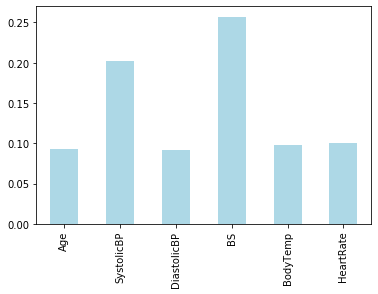

In [16]:
#plotting mutual information gain 
sns.set_style()
mutual_info.plot.bar(color = 'lightblue')

Through mutual information, we can accuarately rank each of the attributes based on the dependancy on the risk attribute. We can infer that both SystolicBP and blood sugars (BS) are the highest ranking attributes therefore should be included in our model. variables such as BodyTemp offer a low mutual information score. It'll be interesting to see any model improvements when we remove this attribute and re-run our algorithms

# Experiments 

I will undertake 3 supervised machine learning methods
- Decision Trees 
- K-neareast Neighbours
- Support Vector Machine

## Decision Trees

before we make our decision tree model, we can pre-prune the decision tree in order to reduce the level of overfitting on the decision tree. 

- this involves the altering of hyperparameter to gain a greater accuracy score 
- we can functionise the summary statistics since they will be repeated throughout our investigation

In [17]:
def summarystats(y_test, y_pred):
    
    accuracyscore =  metrics.accuracy_score(y_test, y_pred)
    precisionscore =  metrics.precision_score(y_test, y_pred, average = 'weighted')
    recallscore = metrics.recall_score(y_test, y_pred ,average = 'macro')
    f1score = metrics.f1_score(y_test, y_pred, average = 'weighted')
    
    print('Accuracy:',accuracyscore)
    print('Precision:',precisionscore )
    print('Recall:',recallscore )
    print('f1:',f1score )

C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6593406593406593
Precision: 0.4963955374914279
Recall: 0.5595744680851064
f1: 0.5579140158087526


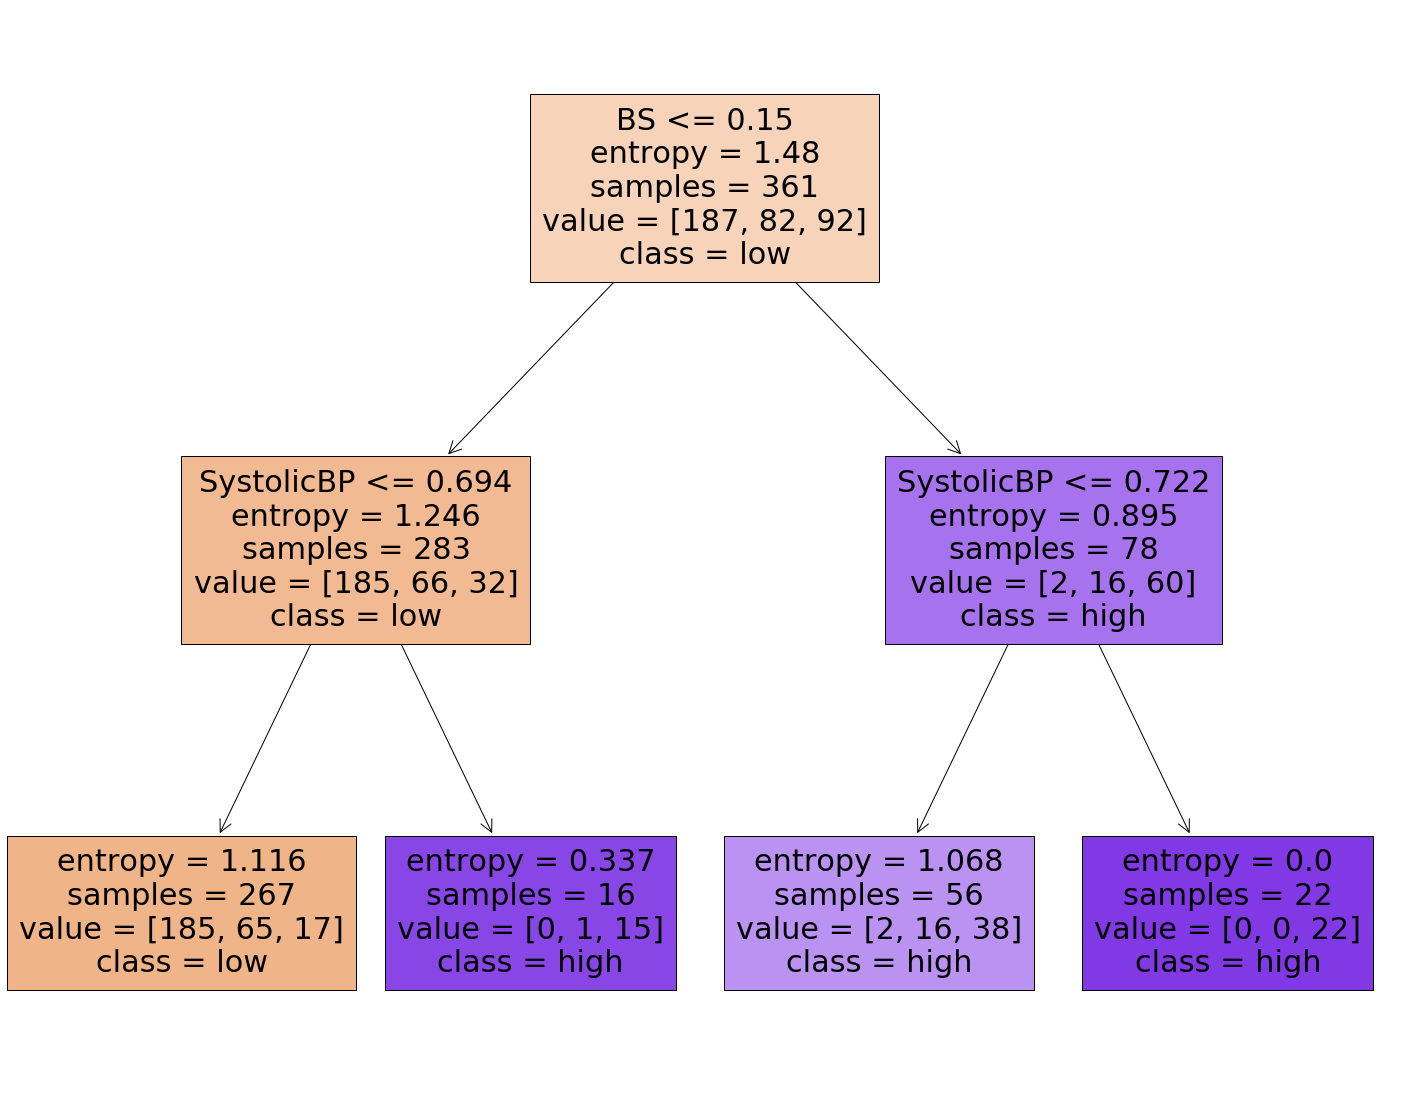

In [18]:
#importing libraries 

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

#creating first model
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 2, min_samples_leaf = 3, min_samples_split = 3)

#fitting the model to the training data 
model = model.fit(X_train, y_train)

#predicting the y test and y train values 
y_pred = model.predict(X_test)

#plotting results 
fig = plt.figure(figsize = (25,20))

dt = tree.plot_tree(model,
                 feature_names =['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'],
                 class_names = ['low','mid','high'],
                
                 filled = True)


#displaying evaluative statistics 

summarystats(y_test, y_pred)


Altering the 'max depth' gives a greater accuracy score on both our testing and traing dataset. Changing the criterion to 'gini'also seems to increase performance in both splits.

Accuracy: 0.6813186813186813
Precision: 0.6631868131868132
Recall: 0.6117612293144208
f1: 0.6588684101264978


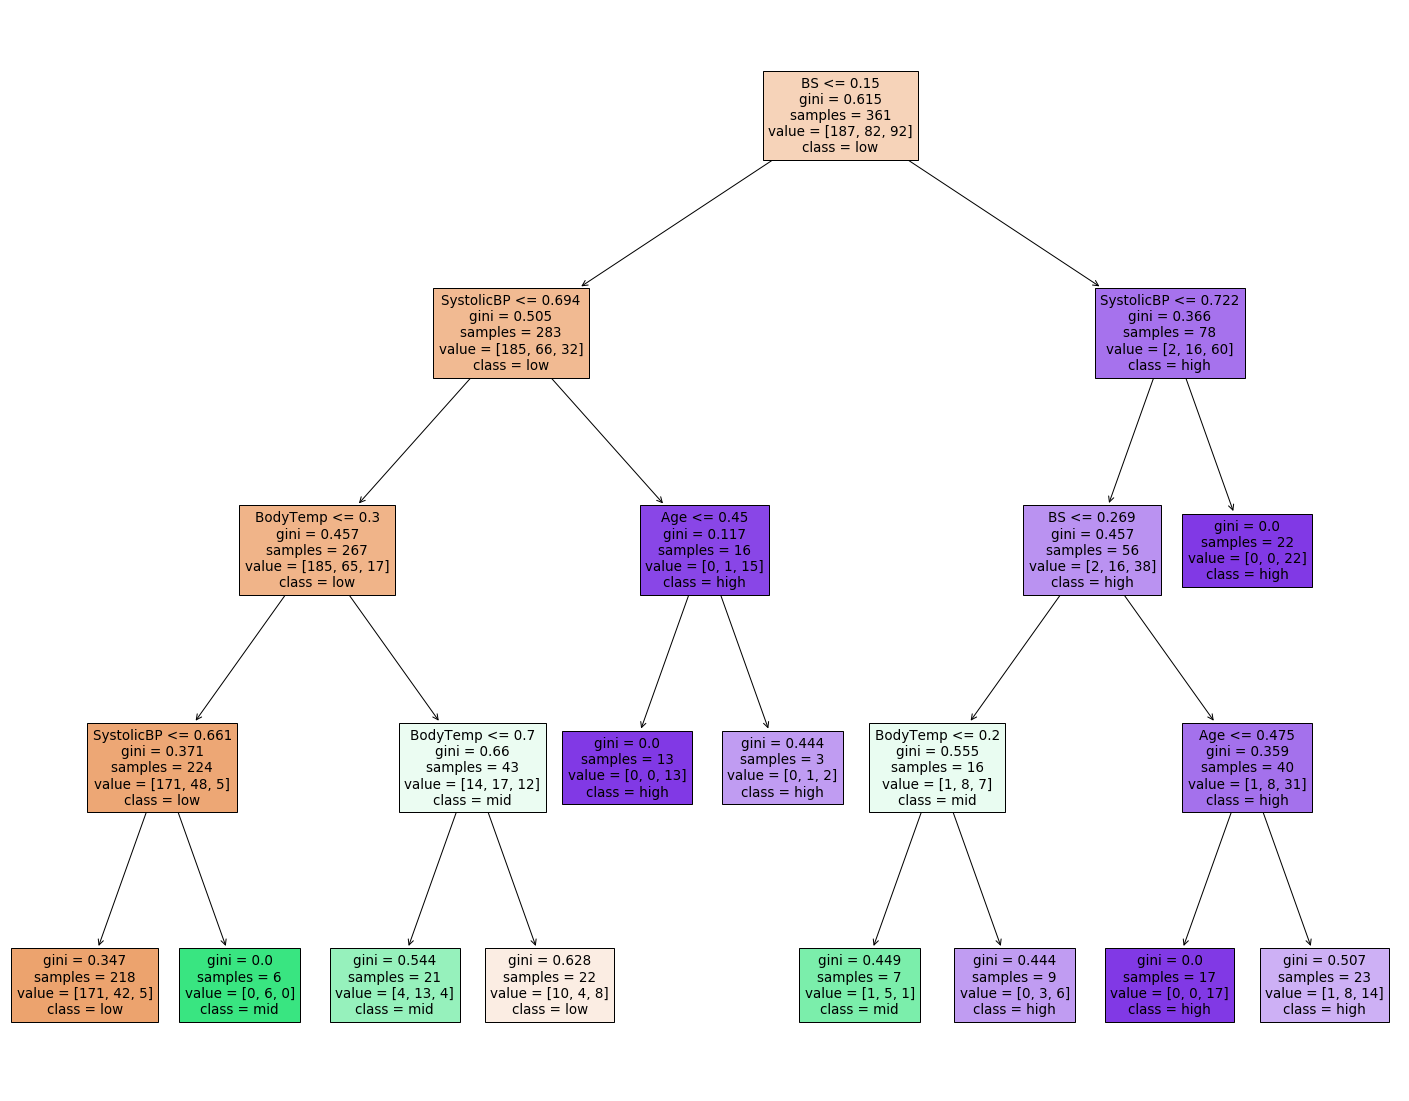

In [19]:
#importing libraries 

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

#creating first model
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 4, min_samples_leaf = 3,min_samples_split = 5 
                              )
#training the model for the x and y training data 
model = model.fit(X_train, y_train)

#predicting the y test and y train values 
y_pred = model.predict(X_test)

#plotting the decision tree 
fig = plt.figure(figsize = (25,20))

dt = tree.plot_tree(model,
                 feature_names =['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'],
                 class_names = ['low','mid','high'],
                
                 filled = True)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


## K-Nearest Neighbours (kNN)

I alter the number of clusters (k) to find the optimal level. 

- k = 7 seems to give us the greatest level of accuracy amongst all our performance evaluations
- we plot the k=7 ROC curve and gain the AUC value of 0.47. Meaning we have an 47% correct predicitons. 
- 'Euclidean' slightly improves the predictability of the model over the 'Manhattan' metric

In [20]:
#displaying evaluative statistics 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

In [21]:
#setting the k equal to the classifier 

k = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

#fitting the test and training data 

k.fit(X_train, y_train)
y_pred = k.predict(X_test)

#finding the y predict 

#displaying evaluative statistics 

summarystats(y_test, y_pred)


Accuracy: 0.6483516483516484
Precision: 0.6338973526473527
Recall: 0.5645390070921986
f1: 0.6155863870149585


In [22]:
#setting the k equal to the classifier 

k = KNeighborsClassifier(n_neighbors=6, metric = 'euclidean')

k.fit(X_train, y_train)
y_pred = k.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)



Accuracy: 0.6593406593406593
Precision: 0.6474648513251454
Recall: 0.5716312056737588
f1: 0.6239219180395651


Accuracy: 0.6373626373626373
Precision: 0.6089629973004662
Recall: 0.5478723404255319
f1: 0.6056602019904771


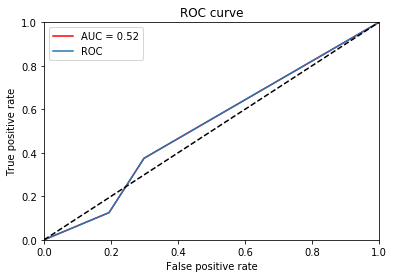

In [23]:
#setting the k equal to the classifier 

k = KNeighborsClassifier(n_neighbors=7, metric = 'manhattan')

k.fit(X_train, y_train)
y_pred = k.predict(X_test)

#finding the false positive rate, true positive rate, threshold and calculating the roc 

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label = 1)
roc_auc =auc(fpr, tpr)

#displaying evaluative statistics 
summarystats(y_test, y_pred)

#plotting this roc 

plt.plot(fpr, tpr, 'r' ,label = 'AUC = %0.2f'%roc_auc)
plt.plot(fpr, tpr, label='ROC')

#setting label and limits

plt.plot([0,1],[0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Accuracy: 0.6373626373626373
Precision: 0.6156244135371269
Recall: 0.5574468085106383
f1: 0.6071394511761484


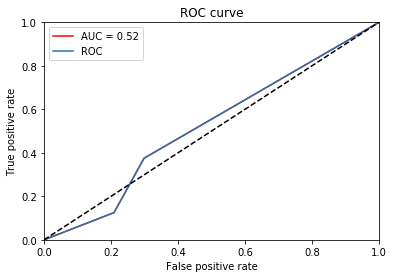

In [24]:
#setting the k equal to the classifier 

k = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')

k.fit(X_train, y_train)
y_pred = k.predict(X_test)

#displaying evaluative statistics 
summarystats(y_test, y_pred)

#finding the false positive rate, true positive rate, threshold and calculating the roc 

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label = 1)
roc_auc =auc(fpr, tpr)

#plotting this roc 

plt.plot(fpr, tpr, 'r' ,label = 'AUC = %0.2f'%roc_auc)
plt.plot(fpr, tpr, label='ROC')

#setting label and limits

plt.plot([0,1],[0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Support Vector Model (SVM)

when using SVM, I explore the 4 main kernal classifies in order to gain the greater classification score. The four main kernals are: 

- Linear 
- Polynomial
- Sigmoid
- Radial Basis Function (RBF)



### Linear  

In [25]:
#importing libraries

from sklearn import svm 
from sklearn import metrics

#setting the kernel to linear and fitting the model

model = svm.SVC(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)



Accuracy: 0.5934065934065934
Precision: 0.4366923585673586
Recall: 0.5074468085106383
f1: 0.5031269286588436


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Polynomial

In [26]:
#setting the kernel to polynomial and fitting the model

model = svm.SVC(kernel = 'poly')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)

Accuracy: 0.6263736263736264
Precision: 0.5814744956536001
Recall: 0.5299645390070922
f1: 0.5733885997043892


### Sigmoid

In [27]:
#setting the kernel to sigmoid and fitting the model

model = svm.SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)

Accuracy: 0.4175824175824176
Precision: 0.2638789781646924
Recall: 0.2790780141843972
f1: 0.32115228225285153


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Radial Basis Function (RBF)

In [28]:
#setting the kernel to rbf and fitting the model

model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


Accuracy: 0.6043956043956044
Precision: 0.5578913839783405
Recall: 0.525354609929078
f1: 0.558274479269915


From these results, we can see that Polynomial provides us with the greater score across all evaluation methods, we can further tune this kernal to see if we can get any further improvements

Since our model is linear, we cant impose a gamma hyperparameter. Instead, we alter the 'c' value controls the level of margin classification hyperplane.

An increased level of C, greater a smaller plane. Comparatively, a lower C value creates a larger margine of separation. We start at C = 2. 

### Tuning 

In [29]:
#setting the kernel to polynimal and fitting the model

model = svm.SVC(kernel = 'poly', C = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


Accuracy: 0.6703296703296703
Precision: 0.6574169390328641
Recall: 0.5923167848699763
f1: 0.6470663839084891


In [30]:
#setting the kernel to polynimal and fitting the model

model = svm.SVC(kernel = 'poly', C = 7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)

Accuracy: 0.6813186813186813
Precision: 0.6670329670329671
Recall: 0.608983451536643
f1: 0.6601833345183452


Despite lowering the margin of separation by increasing the level of C, we still improvements in accuracy, however the other statistic are worsened off. Therefore, we retain the level of 'c' = 3


## Using stacking for model enchancement 

Stacking is  strategy that involves combining multiple classification methods in order to increase model predictions. 

I will be combining both decision tree, with SVM classifer 

- I will be implemeting the same values that gave us the best results for our decision trees as well as for the SVM model. 

In [31]:
#importing libaries 


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# setting our estimators to kNN and Svm, as well as our parameters

estimators =[
    ('kNN',neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'euclidean')),
    ('Dt', DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 4, min_samples_leaf = 3,min_samples_split = 5 ))
]

#setting classifier for my esimator, with my final estimator = logisticregression 

Sclf = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression())

#fitting the model and finding the y predictive value 

Sclf.fit(X_train, y_train)

y_pred = Sclf.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)

Accuracy: 0.6703296703296703
Precision: 0.6520373331518842
Recall: 0.6142434988179669
f1: 0.6536714641780307


From this, we can see that our overall score of predictability has increased to 0.89 2dp. Illistrating, that stacking has worked favourably on our dataset.

## Further model improvements

From attribute selection, we found that the body temperature attribute gave us the lowest mutual information score. To further evaluate our model, we will remove this variable from our training split and see how the results compare.

### Splitting the dataset

In [32]:
#resplitting my data without the BodyTemp variable 

y1 = pd.Series(data.iloc[:,-1])
x1 = pd.DataFrame(X.drop('BodyTemp', 1))
                  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)
                  


In [33]:
x1

,Age,SystolicBP,DiastolicBP,BS,HeartRate
0,0.250000,0.666667,0.607843,0.692308,0.951807
1,0.416667,0.777778,0.803922,0.538462,0.759036
2,0.316667,0.222222,0.411765,0.153846,0.879518
3,0.333333,0.777778,0.705882,0.076923,0.759036
4,0.416667,0.555556,0.215686,0.007692,0.831325
...,...,...,...,...,...
673,0.033333,0.333333,0.019608,0.030769,0.759036
674,0.083333,0.333333,0.215686,0.000000,0.879518
703,0.083333,0.333333,0.000000,0.123077,0.843373
704,0.033333,0.333333,0.019608,0.000000,0.759036


### K-Nearest-Neighbour (kNN)

Accuracy: 0.6593406593406593
Precision: 0.6294632903328556
Recall: 0.50227420402859
f1: 0.6255781983555392


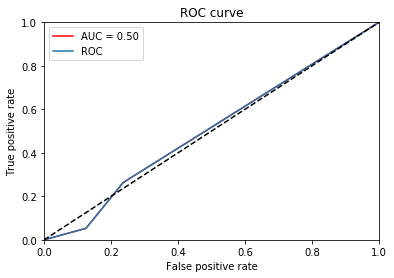

In [34]:
k = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')

k.fit(X_train, y_train)
y_pred = k.predict(X_test)

#finding the false positive rate, true positive rate, threshold and calculating the roc 

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label = 1)
roc_auc =auc(fpr, tpr)

#displaying evaluative statistics 
summarystats(y_test, y_pred)

#plotting this roc 

plt.plot(fpr, tpr, 'r' ,label = 'AUC = %0.2f'%roc_auc)
plt.plot(fpr, tpr, label='ROC')

#setting label and limits

plt.plot([0,1],[0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Decision Tree 

Accuracy: 0.6593406593406593
Precision: 0.6128104771940388
Recall: 0.46718648473034435
f1: 0.6060313670748307


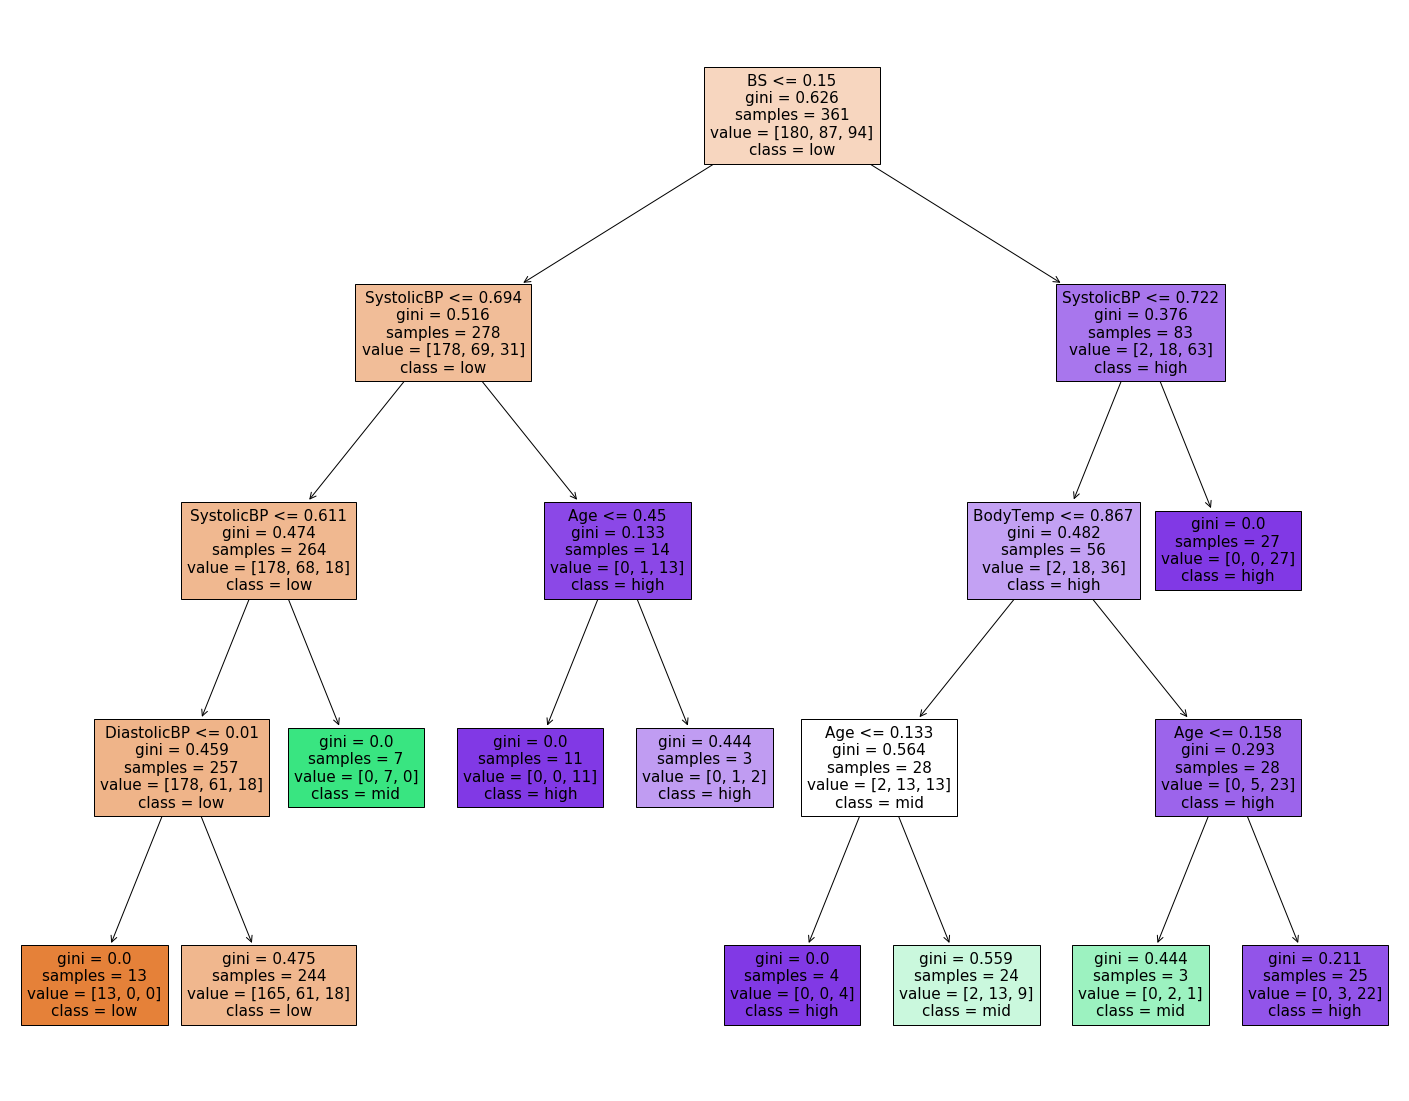

In [35]:
#importing libraries 

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

#creating first model
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 4, min_samples_leaf = 3,min_samples_split = 5 
                              )
#training the model for the x and y training data 
model = model.fit(X_train, y_train)

#predicting the y test and y train values 
y_pred = model.predict(X_test)

#plotting the decision tree 
fig = plt.figure(figsize = (25,20))

dt = tree.plot_tree(model,
                 feature_names =['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'],
                 class_names = ['low','mid','high'],
                
                 filled = True)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


### Support Vector Machine (SVM)

In [36]:
#setting the model and fitting the model 

model = svm.SVC(kernel = 'poly', C = 7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


Accuracy: 0.7142857142857143
Precision: 0.6953481301307387
Recall: 0.5692007797270955
f1: 0.6844641201243388


### Stacking

In [37]:
#importing libaries 

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#setting the estimator to the kNN and svm model 

estimators =[
    ('kNN',neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'euclidean')),
    ('Dt', DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 4, min_samples_leaf = 3,min_samples_split = 5 ))
]


#making the model 

Sclf = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression())

#fitting the model

Sclf.fit(X_train, y_train)

y_pred = Sclf.predict(X_test)

#displaying evaluative statistics 

summarystats(y_test, y_pred)


Accuracy: 0.7252747252747253
Precision: 0.6966409324530656
Recall: 0.5782975958414555
f1: 0.6706024205168334


## Overall results

To conclude, we find that the algorithms rank in the following order:
1. Stacking
2. SVM
3. kNN + DT


Overall, we see greater model performance across our evaluation metric when we remove the attribute BodyTemp. The model is at its optimised level when we combine the SVM and DT models in stacking